In [20]:
from importlib.resources import files
import pyqrlew as sql

In [21]:
# Read data

with files(sql).joinpath('data/retail_demo/dataset.json').open('r') as f:
    dataset = f.read()

with files(sql).joinpath('data/retail_demo/schema.json').open('r') as f:
    schema = f.read()

with files(sql).joinpath('data/retail_demo/size.json').open('r') as f:
    size = f.read()

dataset = sql.Dataset(dataset, schema, size)

In [22]:
dataset.relations()

[(['private', 'campaign_descriptions'], <Relation at 0x111593d20>),
 (['private', 'campaigns'], <Relation at 0x1115937b0>),
 (['private', 'coupon_redemptions'], <Relation at 0x111593ab0>),
 (['private', 'coupons'], <Relation at 0x1115a4960>),
 (['private', 'demographics'], <Relation at 0x1115a4870>),
 (['private', 'households'], <Relation at 0x1115a4690>),
 (['private', 'products'], <Relation at 0x1115a4210>),
 (['private', 'promotions'], <Relation at 0x1115a4570>),
 (['private', 'transactions'], <Relation at 0x1115a4b40>)]

In [23]:
dataset.relations()[0][1].dot()

'digraph graph_dpgr {\n    graph_dpgr[label=<<b>CAMPAIGN_DESCRIPTIONS</b> size ∈ int{27}<br/><b>index</b> = <i>index</i> ∈ int{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}<br/><b>campaign_id</b> = <i>campaign_id</i> ∈ id<br/><b>campaign_type</b> = <i>campaign_type</i> ∈ str<br/><b>start_date</b> = <i>start_date</i> ∈ datetime{2016-11-14 00:00:00, 2016-12-06 00:00:00, 2016-12-28 00:00:00, 2017-02-08 00:00:00, 2017-03-03 00:00:00, 2017-03-08 00:00:00, 2017-03-13 00:00:00, 2017-03-29 00:00:00, 2017-04-03 00:00:00, 2017-04-19 00:00:00, 2017-04-24 00:00:00, 2017-05-08 00:00:00, 2017-05-31 00:00:00, 2017-06-28 00:00:00, 2017-07-12 00:00:00, 2017-08-08 00:00:00, 2017-09-04 00:00:00, 2017-09-20 00:00:00, 2017-10-04 00:00:00, 2017-10-18 00:00:00, 2017-10-30 00:00:00, 2017-11-15 00:00:00, 2017-11-27 00:00:00, 2017-12-06 00:00:00, 2017-12-28 00:00:00}<br/><b>end_date</b> = <i>end_date</i> ∈ datetime{2017-01-16 00:00:00, 2017-02-05 00:00:00, 201

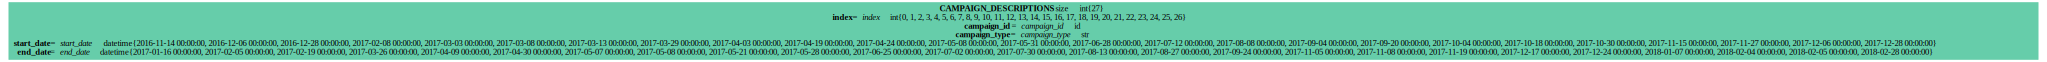

In [24]:
import graphviz
from IPython.display import display

display(graphviz.Source(dataset.relations()[0][1].dot()))

In [25]:
result = dataset.sql('select sum(2*sales_value), count(retail_disc) from transactions group by household_id')

display(graphviz.Source(result.dot()))

thread '<unnamed>' panicked at 'assertion failed: split_named_aggregates(named_exprs.clone()).len() == 1', sqlrewriter/src/relation/mod.rs:308:9


PanicException: assertion failed: split_named_aggregates(named_exprs.clone()).len() == 1

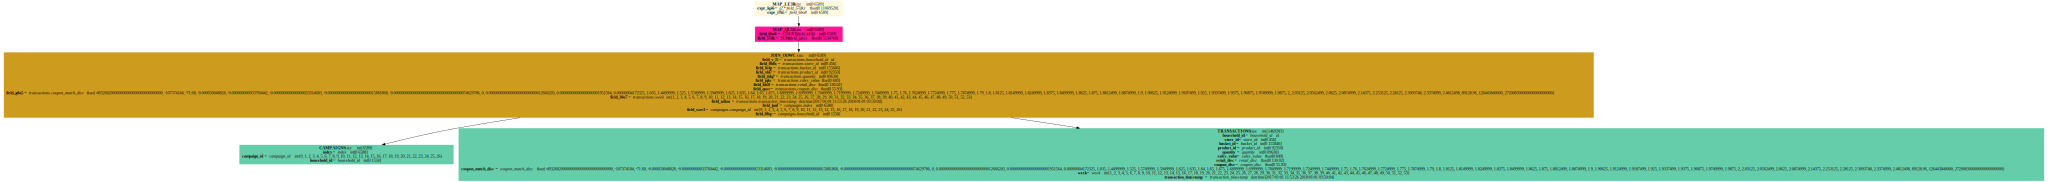

In [19]:
result = dataset.sql('select 2*sum(sales_value), count(retail_disc) from transactions join campaigns group by household_id')

display(graphviz.Source(result.dot()))